# Create Sample Dataset
# ====================

This notebook creates synthetic medical-like images for testing the Grad-CAM pipeline.

## What it does:
- Creates 20 synthetic images with varying complexity
- **Low complexity**: Simple shapes, clear boundaries
- **Medium complexity**: Multiple regions, some texture
- **High complexity**: Complex patterns, fine details

## For production:
Replace with real medical images from:
- NIH Chest X-ray Dataset (112,120 images)
- CheXpert Dataset (224,316 images)
- ImageNet validation set

In [8]:
# Import required libraries
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
from pathlib import Path
import random
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
def create_synthetic_medical_image(size=(224, 224), complexity='medium'):
    """
    Create a synthetic medical-like image with varying complexity.
    
    Parameters:
    - size: Image dimensions
    - complexity: 'low', 'medium', or 'high'
    
    Returns:
    - PIL Image
    """
    # Create base image (grayscale-like)
    img = Image.new('RGB', size, color=(30, 30, 30))
    draw = ImageDraw.Draw(img)
    
    # Add background texture
    pixels = np.array(img)
    noise = np.random.randint(-20, 20, pixels.shape, dtype=np.int16)
    pixels = np.clip(pixels + noise, 0, 255).astype(np.uint8)
    img = Image.fromarray(pixels)
    draw = ImageDraw.Draw(img)
    
    if complexity == 'low':
        # Simple circular region
        center = (size[0]//2, size[1]//2)
        radius = 40
        draw.ellipse(
            [center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius],
            fill=(180, 180, 180), outline=(200, 200, 200)
        )
        
    elif complexity == 'medium':
        # Multiple regions with varying intensities
        num_regions = random.randint(2, 4)
        for _ in range(num_regions):
            x = random.randint(50, size[0]-50)
            y = random.randint(50, size[1]-50)
            r = random.randint(20, 40)
            intensity = random.randint(120, 200)
            draw.ellipse([x-r, y-r, x+r, y+r], fill=(intensity, intensity, intensity))
        
        # Add some lines (ribs, vessels, etc.)
        for _ in range(5):
            x1 = random.randint(0, size[0])
            y1 = random.randint(0, size[1])
            x2 = random.randint(0, size[0])
            y2 = random.randint(0, size[1])
            draw.line([x1, y1, x2, y2], fill=(100, 100, 100), width=2)
            
    else:  # high complexity
        # Many small regions
        num_regions = random.randint(5, 10)
        for _ in range(num_regions):
            x = random.randint(20, size[0]-20)
            y = random.randint(20, size[1]-20)
            r = random.randint(10, 30)
            intensity = random.randint(100, 220)
            draw.ellipse([x-r, y-r, x+r, y+r], fill=(intensity, intensity, intensity))
        
        # Add fine texture
        for _ in range(20):
            x1 = random.randint(0, size[0])
            y1 = random.randint(0, size[1])
            x2 = x1 + random.randint(-20, 20)
            y2 = y1 + random.randint(-20, 20)
            draw.line([x1, y1, x2, y2], fill=(150, 150, 150), width=1)
        
        # Add blur for realism
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # Add slight blur for all
    img = img.filter(ImageFilter.GaussianBlur(radius=0.5))
    
    return img

print("✓ Image generation function defined")

✓ Image generation function defined


In [10]:
# Configuration
num_images = 20
output_dir = 'medical_images'

print("="*70)
print("CREATING SAMPLE DATASET")
print("="*70)
print(f"\nGenerating {num_images} synthetic medical-like images...")
print(f"Output directory: {Path(output_dir).absolute()}")

CREATING SAMPLE DATASET

Generating 20 synthetic medical-like images...
Output directory: /Users/hirthickraj/Projects/computer_vision/Grad-Cam_Analysis_of_Cnn_Decisions/medical_images


In [11]:
# Create output directory
output_path = Path(output_dir)
output_path.mkdir(exist_ok=True)

# Create images with different complexities
complexities = ['low', 'low', 'low', 'medium', 'medium', 'medium', 
                'medium', 'medium', 'high', 'high', 'high', 'high']

created_files = []

for i in range(num_images):
    complexity = complexities[i % len(complexities)]
    
    # Create image
    img = create_synthetic_medical_image(size=(224, 224), complexity=complexity)
    
    # Save
    filename = f'sample_{i+1:03d}_{complexity}.jpg'
    filepath = output_path / filename
    img.save(filepath, quality=95)
    created_files.append(str(filepath))
    
    if (i + 1) % 5 == 0:
        print(f"  Created {i+1}/{num_images} images...")

print(f"\n✓ Created {num_images} sample images")

  Created 5/20 images...
  Created 10/20 images...
  Created 15/20 images...
  Created 20/20 images...

✓ Created 20 sample images



Visualization of sample images:


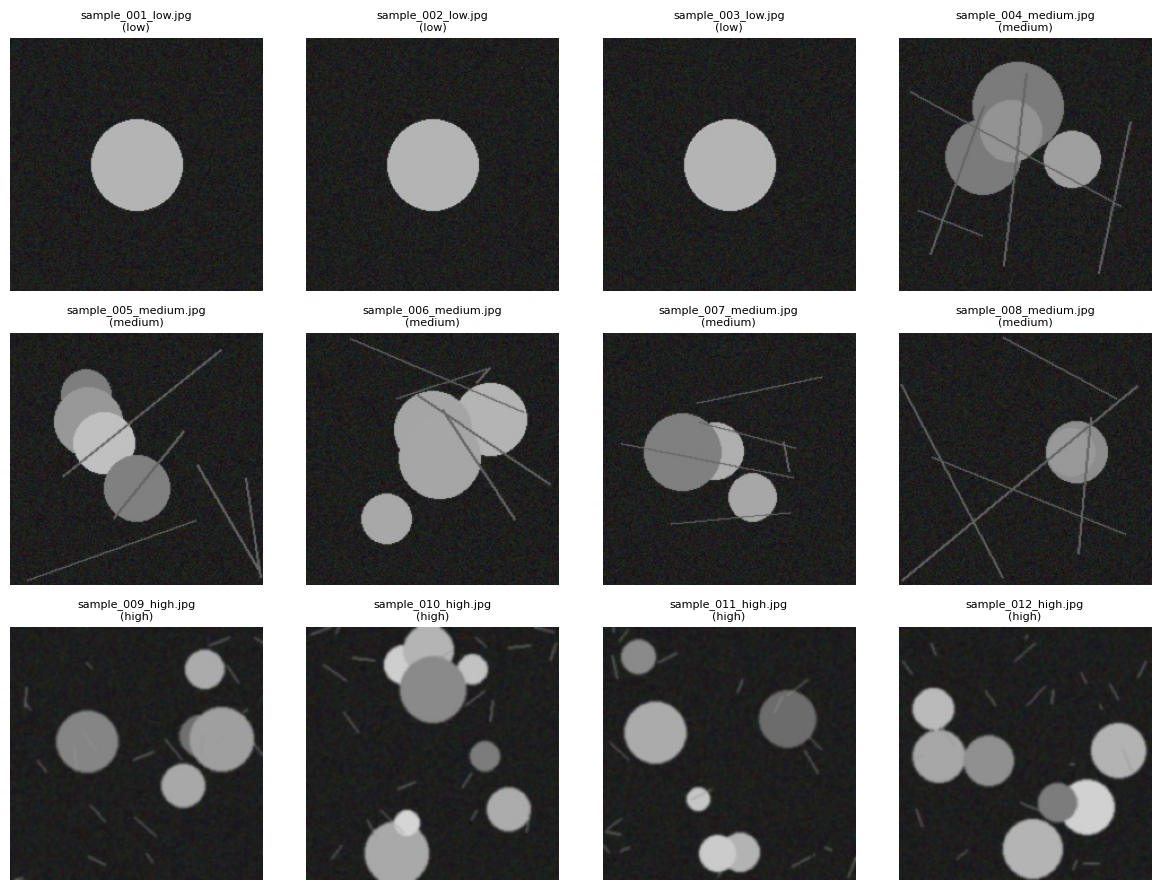


✓ Saved preview to: dataset_preview.png


In [12]:
# Visualize sample images
print("\nVisualization of sample images:")

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

# Show first 12 images
for idx, ax in enumerate(axes):
    if idx < len(created_files):
        img = Image.open(created_files[idx])
        ax.imshow(img)
        filename = Path(created_files[idx]).name
        complexity = filename.split('_')[-1].replace('.jpg', '')
        ax.set_title(f'{filename}\n({complexity})', fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('dataset_preview.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Saved preview to: dataset_preview.png")

In [13]:
# Create README
readme_path = output_path / 'README.txt'
with open(readme_path, 'w') as f:
    f.write("Sample Synthetic Dataset\n")
    f.write("="*50 + "\n\n")
    f.write(f"This directory contains {num_images} synthetic medical-like images\n")
    f.write("for testing the Adaptive Integrated Grad-CAM pipeline.\n\n")
    f.write("Image Complexity Levels:\n")
    f.write("- LOW: Simple shapes, clear boundaries (~30% of images)\n")
    f.write("- MEDIUM: Multiple regions, some texture (~40% of images)\n")
    f.write("- HIGH: Complex patterns, high detail (~30% of images)\n\n")
    f.write("For a real PhD project, please use:\n")
    f.write("1. NIH Chest X-ray Dataset (112,120 images)\n")
    f.write("   https://nihcc.app.box.com/v/ChestXray-NIHCC\n\n")
    f.write("2. CheXpert Dataset (224,316 images)\n")
    f.write("   https://stanfordmlgroup.github.io/competitions/chexpert/\n\n")
    f.write("3. ImageNet Validation Set\n")
    f.write("   http://image-net.org/\n")

print(f"✓ Created README: {readme_path}")

✓ Created README: medical_images/README.txt


In [14]:
# Summary statistics
print("\n" + "="*70)
print("DATASET SUMMARY")
print("="*70)

low_count = sum(1 for f in created_files if 'low' in f)
medium_count = sum(1 for f in created_files if 'medium' in f)
high_count = sum(1 for f in created_files if 'high' in f)

print(f"\nTotal images: {num_images}")
print(f"  - Low complexity: {low_count} ({low_count/num_images*100:.1f}%)")
print(f"  - Medium complexity: {medium_count} ({medium_count/num_images*100:.1f}%)")
print(f"  - High complexity: {high_count} ({high_count/num_images*100:.1f}%)")
print(f"\nLocation: {output_path.absolute()}")
print("\n" + "="*70)
print("DATASET READY!")
print("="*70)
print("\nNext steps:")
print("  1. Run experiments: Open notebook 3_run_batch_experiments.ipynb")
print("  2. Or run complete pipeline: Open notebook 4_complete_pipeline.ipynb")
print("  3. For production, replace with real medical images")
print("="*70 + "\n")


DATASET SUMMARY

Total images: 20
  - Low complexity: 6 (30.0%)
  - Medium complexity: 10 (50.0%)
  - High complexity: 4 (20.0%)

Location: /Users/hirthickraj/Projects/computer_vision/Grad-Cam_Analysis_of_Cnn_Decisions/medical_images

DATASET READY!

Next steps:
  1. Run experiments: Open notebook 3_run_batch_experiments.ipynb
  2. Or run complete pipeline: Open notebook 4_complete_pipeline.ipynb
  3. For production, replace with real medical images

